In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
# Read the CSV file into a DataFrame
df = pd.read_csv('train_data.csv')
# Display the shape (number of rows and columns) of the DataFrame
df.shape

(318438, 18)

In [9]:
 df.head()


,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [10]:
 df.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay'],
      dtype='object')

In [11]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [12]:
 df.isnull().sum()


case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [13]:
# Handle missing values
df['Bed Grade'].fillna(df['Bed Grade'].median(), inplace=True)
df['City_Code_Patient'].fillna(-1, inplace=True)

# Verify that missing values have been handled
df.isnull().sum()


case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
patientid                            0
City_Code_Patient                    0
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
dtype: int64

In [14]:
# Explore categorical variables
categorical_columns = ['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type',
                        'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness', 'Age', 'Stay']

# Display counts for each category in categorical columns
for column in categorical_columns:
    print(df[column].value_counts())


a    143425
b     68946
c     45928
e     24770
d     20389
f     10703
g      4277
Name: Hospital_type_code, dtype: int64
X    133336
Y    122428
Z     62674
Name: Hospital_region_code, dtype: int64
gynecology            249486
anesthesia             29649
radiotherapy           28516
TB & Chest disease      9586
surgery                 1201
Name: Department, dtype: int64
R    127947
Q    106165
S     77794
P      5046
T      1477
U         9
Name: Ward_Type, dtype: int64
F    112753
E     55351
D     51809
C     35463
B     35156
A     27906
Name: Ward_Facility_Code, dtype: int64
Trauma       152261
Emergency    117676
Urgent        48501
Name: Type of Admission, dtype: int64
Moderate    175843
Minor        85872
Extreme      56723
Name: Severity of Illness, dtype: int64
41-50     63749
31-40     63639
51-60     48514
21-30     40843
71-80     35792
61-70     33687
11-20     16768
81-90      7890
0-10       6254
91-100     1302
Name: Age, dtype: int64
21-30                 87491
11-2

In [15]:
# Explore numerical variables
numeric_columns = ['Available Extra Rooms in Hospital', 'Bed Grade', 'Visitors with Patient', 'Admission_Deposit']

# Display summary statistics for numerical columns
print(df[numeric_columns].describe())


       Available Extra Rooms in Hospital      Bed Grade  \
count                      318438.000000  318438.000000   
mean                            3.197627       2.625940   
std                             1.168171       0.873019   
min                             0.000000       1.000000   
25%                             2.000000       2.000000   
50%                             3.000000       3.000000   
75%                             4.000000       3.000000   
max                            24.000000       4.000000   

       Visitors with Patient  Admission_Deposit  
count          318438.000000      318438.000000  
mean                3.284099        4880.749392  
std                 1.764061        1086.776254  
min                 0.000000        1800.000000  
25%                 2.000000        4186.000000  
50%                 3.000000        4741.000000  
75%                 4.000000        5409.000000  
max                32.000000       11008.000000  


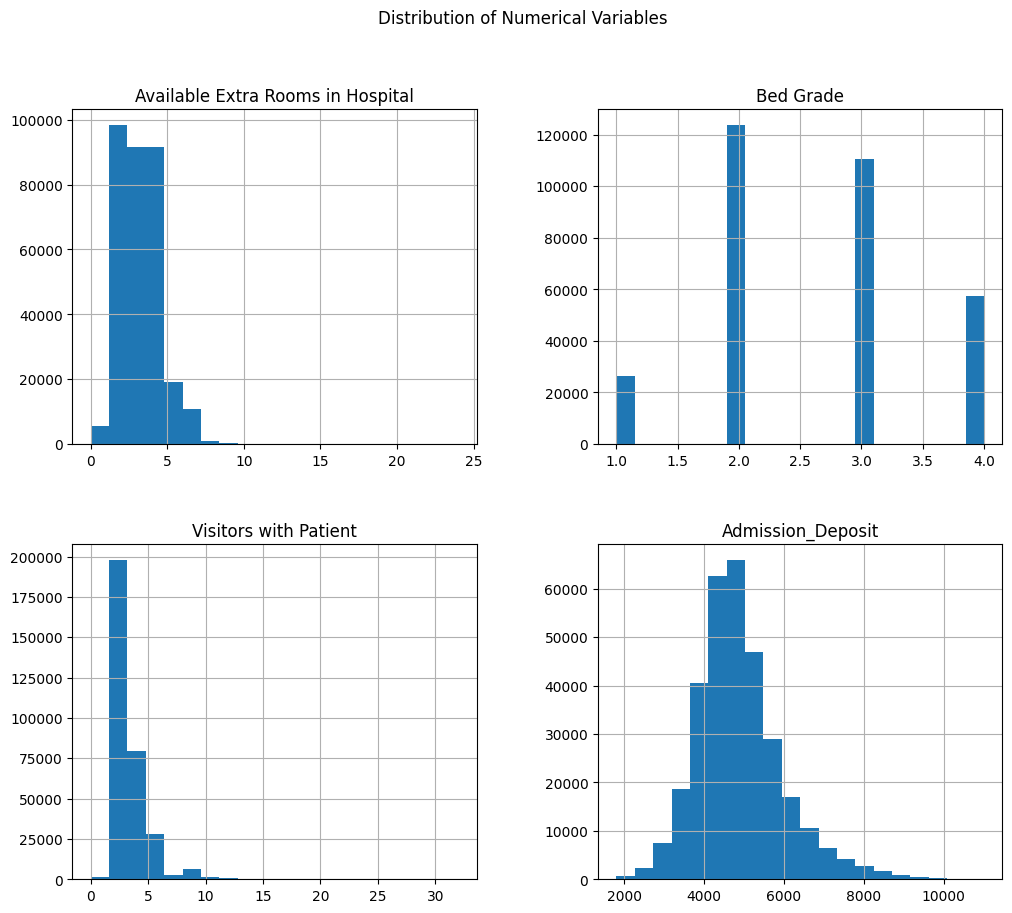

In [17]:
# Visualize the distribution of numerical variables
df[numeric_columns].hist(figsize=(12, 10), bins=20)
plt.suptitle('Distribution of Numerical Variables')
plt.show()



Interpretation :

The 'Available Extra Rooms in Hospital' have a mean of approximately 3.20, with a range from 0 to 24. The 'Bed Grade' distribution shows a mean of 2.63, indicating a predominantly moderate condition. The average number of 'Visitors with Patient' is around 3.28, with a maximum of 32. Regarding the 'Admission_Deposit,' the mean deposit is 4880.75, ranging from 1800 to 11008. These statistics offer a snapshot of the hospital's capacity, bed conditions, visitor frequency, and financial aspects, providing a foundation for further analysis and decision-making in healthcare management.

In [21]:
# Explore the frequency of classes in the 'Stay' variable
stay_counts = df['Stay'].value_counts()

# Display the frequency of each class
print("Frequency of Classes in 'Stay' Variable:")
print(stay_counts)


Frequency of Classes in 'Stay' Variable:
21-30                 87491
11-20                 78139
31-40                 55159
51-60                 35018
0-10                  23604
41-50                 11743
71-80                 10254
More than 100 Days     6683
81-90                  4838
91-100                 2765
61-70                  2744
Name: Stay, dtype: int64


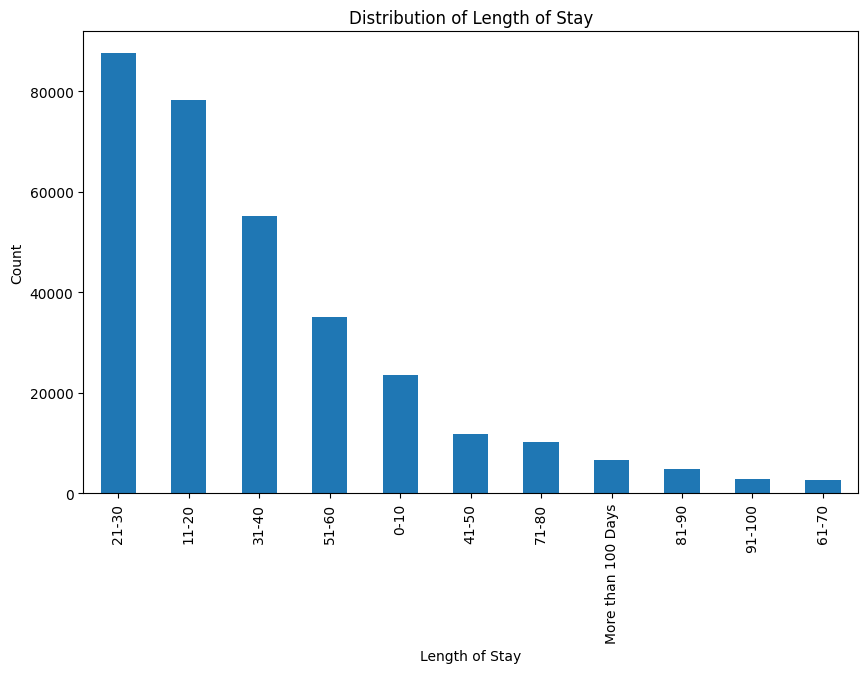

In [16]:
# Visualize the distribution of the variable 'Stay'
plt.figure(figsize=(10, 6))
df['Stay'].value_counts().plot(kind='bar')
plt.title('Distribution of Length of Stay')
plt.xlabel('Length of Stay')
plt.ylabel('Count')
plt.show()


Interpretation :
    
The  distribution of the 'Stay' variable provides a clear overview of the length of stay patterns in the healthcare dataset. The majority of cases fall within the '21-30' days category, with 87,491 instances, followed closely by '11-20' days with 78,139 cases. The distribution gradually decreases for longer durations, with '31-40' days having 55,159 cases and '51-60' days having 35,018 cases. Shorter stays, such as '0-10' days and '41-50' days, also have notable frequencies with 23,604 and 11,743 cases, respectively. The dataset includes a range of stay durations, including cases with longer stays like '71-80' days, 'More than 100 Days' with 6,683 cases, and shorter durations like '81-90' days, '91-100' days, and '61-70' days. This information provides a comprehensive understanding of the distribution of patient stays, which is crucial for healthcare management and planning.

C:\Users\pc\AppData\Local\Temp\ipykernel_13812\1525432227.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


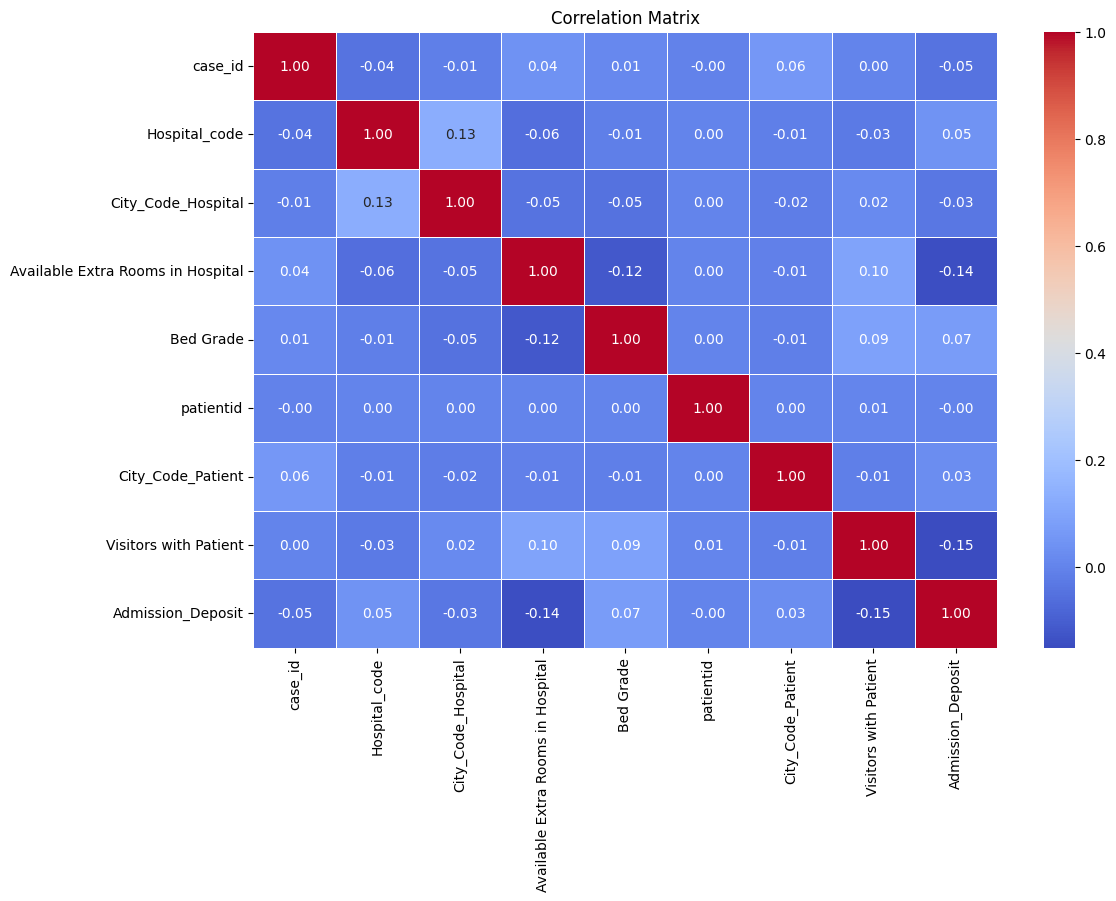

In [19]:
# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


Interpretation :

the hospital code shows a moderate positive correlation with the city code of the hospital, suggesting larger hospitals tend to be located in more populous cities. Additionally, the number of available extra rooms in a hospital exhibits negative correlations with both the hospital code and admission deposit, implying that larger hospitals may have fewer available extra rooms and higher admission deposits. Patient-related variables, such as patient ID, demonstrate minimal correlations with other factors. Furthermore, there is a negative correlation between the number of visitors with a patient and the admission deposit, indicating that a higher deposit may be associated with fewer visitors. These insights contribute to understanding potential patterns and associations within the healthcare data.

Conclusion :
    
 The analysis of the healthcare dataset has provided valuable insights into various aspects of patient admissions and stays. The exploration of categorical variables highlighted the distribution patterns across hospital types, regions, departments, admission types, severity of illness, age groups, and length of stay categories. Notably, the most common length of stay is in the '21-30' days range, and the 'gynecology' department sees the highest number of cases. The analysis of numerical variables revealed correlations that offer a nuanced understanding of relationships between factors such as hospital characteristics, patient-related variables, and room-related factors. For instance, larger hospitals may have fewer available extra rooms, and a higher admission deposit may be associated with fewer visitors. The frequency distribution of the 'Stay' variable provides a detailed overview of the distribution of patient stays, aiding in healthcare management and planning. Overall, these findings contribute to a comprehensive understanding of the healthcare landscape in the dataset, offering valuable insights for decision-making and further analysis in the realm of healthcare analytics.